# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [20]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Reidsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=reidsville
Processing Record 2 | Manoel Urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=manoel%20urbano
Processing Record 3 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=bredasdorp
Processing Record 4 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=lata
Processing Record 5 | Dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=dakar
Processing Record 6 | Morant Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=morant%20bay
City not found. Skipping...
Processing Record 7 | Kenai
http://api.openwe

Processing Record 56 | Russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=russell
Processing Record 57 | Arrifes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=arrifes
Processing Record 58 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=barrow
Processing Record 59 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=evensk
Processing Record 60 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=longyearbyen
Processing Record 61 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=punta%20arenas
City not found. Skipping...
Processing Record 62 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9

Processing Record 112 | Zionsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=zionsville
Processing Record 113 | Nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=nioro
Processing Record 114 | Alpena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=alpena
Processing Record 115 | Custoias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=custoias
City not found. Skipping...
Processing Record 116 | Tecpan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=tecpan
Processing Record 117 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=tautira
City not found. Skipping...
Processing Record 118 | Synya
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 167 | Gondanglegi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=gondanglegi
Processing Record 168 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=bambous%20virieux
Processing Record 169 | Ratnagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=ratnagiri
Processing Record 170 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=chuy
Processing Record 171 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=talnakh
Processing Record 172 | Ures
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=ures
Processing Record 173 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b

Processing Record 223 | Pyay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=pyay
Processing Record 224 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=kavaratti
Processing Record 225 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=faanui
Processing Record 226 | Erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=erenhot
Processing Record 227 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=mar%20del%20plata
Processing Record 228 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=beyneu
Processing Record 229 | Kuji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=

Processing Record 279 | Yabelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=yabelo
Processing Record 280 | Sukabumi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=sukabumi
Processing Record 281 | Thunder Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=thunder%20bay
Processing Record 282 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=san%20patricio
Processing Record 283 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=port%20elizabeth
Processing Record 284 | Concepcion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=concepcion
Processing Record 285 | Huanta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 334 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=thinadhoo
Processing Record 335 | Merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=merauke
Processing Record 336 | Ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=ambon
Processing Record 337 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=nanortalik
Processing Record 338 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=vila%20velha
Processing Record 339 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=nouadhibou
Processing Record 340 | Sainte-Marie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52

Processing Record 389 | Nybro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=nybro
Processing Record 390 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=ahipara
Processing Record 391 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=muros
Processing Record 392 | Barmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=barmer
Processing Record 393 | Langarud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=langarud
Processing Record 394 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=xining
Processing Record 395 | Yabrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=yabrud
Processing 

Processing Record 444 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=hofn
Processing Record 445 | Chateaubelair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=chateaubelair
Processing Record 446 | Agen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=agen
Processing Record 447 | Arsenyev
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=arsenyev
Processing Record 448 | Ler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=ler
Processing Record 449 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=kruisfontein
Processing Record 450 | Anaconda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=an

Processing Record 500 | Talaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=talaya
Processing Record 501 | Weligama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=weligama
Processing Record 502 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=torbay
Processing Record 503 | Alikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=alikovo
Processing Record 504 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=emba
Processing Record 505 | Lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=lucapa
Processing Record 506 | Cootamundra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=91861d4cb9c646a52bfc56b7f2189566&q=cootamundra
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()


City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [22]:
# Save data frame to CSV
weather_data.to_csv('weather.csv', index=False, header=None)

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Reidsville,90,US,1551290714,52,36.35,-79.66,46.99,3.74
1,Manoel Urbano,64,BR,1551290717,78,-8.84,-69.26,84.11,2.95
2,Bredasdorp,0,ZA,1551290453,43,-34.53,20.04,71.60,18.34
3,Lata,48,IN,1551290719,100,30.78,78.62,27.77,1.05
4,Dakar,0,SN,1551288600,8,14.69,-17.45,87.80,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

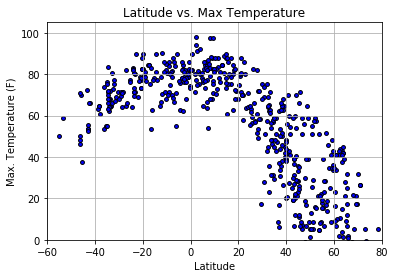

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",facecolors="blue", edgecolors="black",s=15)

# Set the upper and lower limits of our y axis
plt.ylim(0,105)

# Set the upper and lower limits of our x axis
plt.xlim(-60,80)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

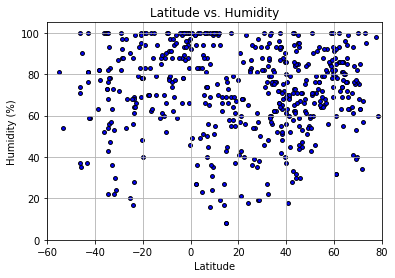

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",facecolors="blue", edgecolors="black", s=15)

# Set the upper and lower limits of our y axis
plt.ylim(0,105)

# Set the upper and lower limits of our x axis
plt.xlim(-60,80)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

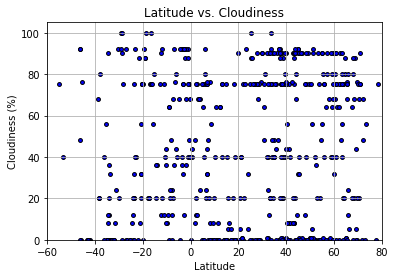

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",facecolors="blue", edgecolors="black", s=15)

# Set the upper and lower limits of our y axis
plt.ylim(0,105)

# Set the upper and lower limits of our x axis
plt.xlim(-60,80)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

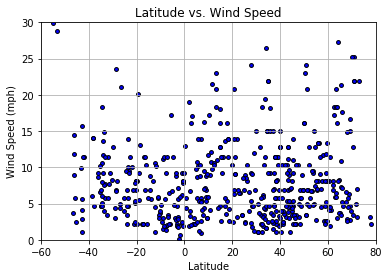

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",facecolors="blue", edgecolors="black", s=15)

# Set the upper and lower limits of our y axis
plt.ylim(0,30)

# Set the upper and lower limits of our x axis
plt.xlim(-60,80)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()